# Optimizing Camera Distance for Aircraft Position Observation and Calculation

## 1. Problem Definition

![1](2.png)

In this problem, we have three main points:
- O₁, O₂: positions of two cameras
- M: aircraft position

The goal is to find the appropriate distance between two cameras for efficient observation and calculation of aircraft position.

Notation:
- d: distance between two cameras (O₁O₂)
- h: aircraft altitude
- $r_{1,2}$: distance from camera(1,2) to aircraft
- w: contrail width
- p: number of pixels displaying contrail
- φ: angle between camera-aircraft line and horizontal plane (in degrees)
- R: camera horizontal resolution
- α: camera vertical field of view (VFOV)



## 2. Analysis of Influencing Factors

### 2.1. Effect of Camera Distance on Contrail Pixel Display

When d is large, r will also be large. This results in smaller contrail images, reducing the number of pixels used to display the contrail.

Formula for calculating pixels across contrail width:

$$p = (w/r) * (R/(2*tan(α/2)))$$


Where:
- w = 200-400m (according to [FAA](https://www.faa.gov/sites/faa.gov/files/regulations_policies/policy_guidance/envir_policy/contrails.pdf))
- Reason for choosing w = 200m: We are more concerned with old contrails that have existed for some time and spread. Choosing the minimum value of 200m helps examine the most challenging case.
- R = 3840 (4K camera)
- α = 67.3°

Example with φ = 60° and h = 12000m:

$$
r = 13856m
p = (200/13856) * (3840/(2*tan(67.3/2)))
  ≈ 0.0144 * 2880
  ≈ 42 pixels
$$

### 2.2. Effect of Camera Distance on Height Calculation Accuracy

When d is small, angles φ₁ and φ₂ will be large. Height is calculated using the formula:
$$
h = M₁H * tan(φ₁) = M₂H * tan(φ₂)
$$

When φ > 70°, the tan(x) function curve increases very rapidly:

![3](3.png)



## 3. Reasons for Choosing h = 12km

1. This is the maximum altitude at which aircraft typically fly
2. At this altitude:
   - The angle between camera and aircraft will be maximum
   - Distance r will be longest
3. If the system works well at this altitude, it will work well at lower altitudes



## 4. Case Comparisons

Here, we test with $\phi_1$ and $ \phi_2 $ less than $ 70^\circ $ to avoid significant error impact, but not too small to prevent the distance between the aircraft and the two cameras from becoming too large, which would reduce the number of pixels representing the contrail. We consider three cases here with $\phi_1 = \phi_2 = \phi \in \{60^\circ, 65^\circ, 70^\circ\} $.

### 4.1. With φ = 60°:
- $r = h/sin(60°) ≈ 13856 $ m
- $p = (200/13856) * (3840/(2*tan(67.3/2))) ≈ 42$ pixels
- $d = 2 * h * cos(60°)/sin(60°) ≈ 13856$ m

### 4.2. With φ = 65°:
- $r = h/sin(65°) ≈ 13241$ m
- $p = (200/13241) * (3840/(2*tan(67.3/2))) ≈ 44$ pixels
- $d = 2 * h * cos(65°)/sin(65°) ≈ 11191$ m

### 4.3. With φ = 70°:
- $r = h/sin(70°) ≈ 12770$ m
- $p = (200/12770) * (3840/(2*tan(67.3/2))) ≈ 45$ pixels
- $d = 2 * h * cos(70°)/sin(70°) ≈ 8735$ m



## 5. Results Summary Table

| Angle φ | Distance d (m) | Pixels p |
|---------|---------------|----------|
| 60°     | 13856         | 42       |
| 65°     | 11191         | 44       |
| 70°     | 8735          | 45       |



## 6. Conclusion

From the above table, we can observe:
1. Increasing d => increases r, leading to decreased p
2. Decreasing d => increases φ, potentially causing large errors when φ > 70°

To balance between pixel display and error potential, we choose φ = 65°. At this angle:
- p = 44 pixels: sufficient for effective contrail analysis
- φ is small enough to limit errors in height calculation
- d ≈ 11191m: reasonable distance for practical deployment




# **Estimate Aircraft Positioning in 3D Space from Image Data**



## **1. Problem Overview**

### **Objective**
- Determine the coordinates $(x, y, z)$ of the aircraft in 3D space.
- Use data from **2 fixed cameras** at known positions.
- Compute the **estimated coordinates** of the aircraft relative to sea level.

### **Input**
- Geographic coordinates (latitude, longitude) and altitude of 2 cameras: $(lat_1, lon_1, alt_1), (lat_2, lon_2, alt_2)$.
- Camera specifications:
  - Resolution: $(W, H)$ (pixels).
  - Horizontal Field of View (HFOV) and Vertical Field of View (VFOV).
  - Tilt angle: $(\theta_\text{tilt})$.
- Pixel coordinates of the aircraft on the images from 2 cameras: $((px_1, py_1), (px_2, py_2))$.

### **Output**
- Position of the aircraft $(x, y, z)$ in 3D space.
- Estimated altitude $(z_\text{real})$ of the aircraft.
- Distance from the aircraft to each camera.
- Viewing angles from each camera to the aircraft.





## **2. Coordinate System and Reference Plane**

### **Coordinate System $Oxyz$**
- Origin $O$: The projection point of camera 1 onto the plane \(z = 0\).
- **X-axis**: The line connecting the projections of the two cameras on the \(z = 0\) plane.
- **Z-axis**: The vertical direction, perpendicular to sea level.
- **Y-axis**: Perpendicular to the \(xOz\) plane, following the right-hand rule.

### **Reference Plane \(z = 0\)**
- Coincides with the **Mean Sea Level (MSL)**.
- All altitudes are calculated relative to this plane:
  - **Camera 1**: \((0, 0, alt_1)\).
  - **Camera 2**: \((D, 0, alt_2)\), where \(D\) is the geographic distance.







### **3. Distance Between the Two Cameras**

#### **Haversine Formula**
The distance $D$ between two points on the surface of a sphere is calculated using the following formula:
$$
D = R \cdot c
$$
Where:
- $R = 6371000 \, \text{m}$ is the Earth's radius (in meters).
- $c = 2 \cdot \arctan2\left(\sqrt{a}, \sqrt{1-a}\right)$.
- $a = \sin^2\left(\frac{\Delta \phi}{2}\right) + \cos(\phi_1) \cdot \cos(\phi_2) \cdot \sin^2\left(\frac{\Delta \lambda}{2}\right)$.
- $\Delta \phi = \phi_2 - \phi_1$ is the latitude difference (radians).
- $\Delta \lambda = \lambda_2 - \lambda_1$ is the longitude difference (radians).

#### **3D Distance Calculation**
To calculate the distance between two points in 3D space, we need to include the altitude (height) difference between the two points:
$$
\text{distance} = \sqrt{(\text{ground distance})^2 + (\text{altitude difference})^2}
$$
Where:
- **ground distance** is calculated using the Haversine formula as described above.
- **altitude difference** is the difference in height between the two points: $alt_2 - alt_1$.





## **4. Angle Between the Pixel and Image Axes**

### **Alpha Angle (\(\alpha\))**
The angle between the pixel point and the vertical axis of the image (y-axis):
$$
\alpha = -\arctan\left[\frac{(px - W/2)}{W/2} \cdot \tan(\text{HFOV}/2)\right]
$$

### **Beta Angle (\(\beta\))**
The angle between the pixel point and the horizontal axis of the image (x-axis):
$$
\beta = \theta_\text{tilt} + \arctan\left[\frac{(py - H/2)}{H/2} \cdot \tan(\text{VFOV}/2)\right]
$$
- $\beta > \theta_\text{tilt}$: The pixel point is below the horizontal axis of the image.
- $\beta < \theta_\text{tilt}$: The pixel point is above the horizontal axis of the image.





## **5. Direction Vector from Camera to Aircraft**

### **Direction Vector $M$**
From angles $\alpha$ and $\beta$, construct the unit vector $M = [\cos\theta_x, \cos\theta_y, \cos\theta_z]$.

#### **Camera 1**:
$$
\cos\theta_x = \sqrt{1 - \sin^2\alpha - \sin^2\beta}, \, \cos\theta_y = \sin\alpha, \, \cos\theta_z = \sin\beta
$$

#### **Camera 2**:
$$
\cos\theta_x = -\sqrt{1 - \sin^2\alpha - \sin^2\beta}, \, \cos\theta_y = -\sin\alpha, \, \cos\theta_z = \sin\beta
$$





## **6. Determining the Aircraft’s Position**

### **Line Equation**
The line equations for each camera:
$$
L_1: P_1 + t \cdot M_1, \quad L_2: P_2 + s \cdot M_2
$$
- $(P_1, P_2)$: The positions of the cameras.
- $(M_1, M_2)$: The direction vectors.
- $(t, s)$: The parameters of the lines.

### **Closest Points Between the Two Lines**
The closest point of intersection (if any) is determined by:
$$
t = \frac{\text{dot}(\text{cross}(v, M_2), \text{cross}(M_1, M_2))}{|\text{cross}(M_1, M_2)|^2}
$$
$$
s = \frac{\text{dot}(\text{cross}(v, M_1), \text{cross}(M_1, M_2))}{|\text{cross}(M_1, M_2)|^2}
$$
Where:
- $v = P_2 - P_1$.
- $\text{dot}$: Dot product.
- $\text{cross}$: Cross product.

### **Estimated Position of the Aircraft**
The position of the aircraft is the midpoint between the closest points:
$$
(x, y, z) = \frac{(P_1 + t \cdot M_1) + (P_2 + s \cdot M_2)}{2}
$$



In [5]:
import math
import numpy as np

def calculate_distance(lat1, lon1, alt1, lat2, lon2, alt2):
    R = 6371000  # Bán kính Trái Đất tính bằng mét

    # Chuyển đổi độ sang radian
    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)

    # Haversine formula
    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad
    a = math.sin(dlat/2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))

    # Khoảng cách trên mặt đất
    ground_distance = R * c

    # Tính khoảng cách trong không gian 3D
    height_diff = alt2 - alt1
    distance = math.sqrt(ground_distance**2 + height_diff**2)
    return distance

def calculate_angles(pixel, resolution, hfov, vfov, tilt_angle):
    hfov_rad = math.radians(hfov)
    vfov_rad = math.radians(vfov)
    tilt_angle_rad = math.radians(tilt_angle)

    # Calculate alpha angle (horizontal)
    alpha = -math.atan((pixel[0] - resolution[0]/2) / (resolution[0]/2) * math.tan(hfov_rad/2))

    # Calculate beta angle (vertical)
    beta = tilt_angle_rad + math.atan((pixel[1] - resolution[1]/2) / (resolution[1]/2) * math.tan(vfov_rad/2))

    return alpha, beta

def calculate_direction_vector(alpha, beta, is_camera2=False):
    if not is_camera2:
        costhetax = math.sqrt(1 - math.sin(alpha)**2 - math.sin(beta)**2)
        costhetay = math.sin(alpha)
        costhetaz = math.sin(beta)
    else:
        costhetax = -math.sqrt(1 - math.sin(alpha)**2 - math.sin(beta)**2)
        costhetay = -math.sin(alpha)
        costhetaz = math.sin(beta)
    
    return np.array([costhetax, costhetay, costhetaz])

def find_closest_point(P1, P2, M1, M2):
    v = P2 - P1
    t = np.dot(np.cross(v, M2), np.cross(M1, M2)) / np.linalg.norm(np.cross(M1, M2))**2
    s = np.dot(np.cross(v, M1), np.cross(M1, M2)) / np.linalg.norm(np.cross(M1, M2))**2
    
    Pc1 = P1 + t * M1
    Pc2 = P2 + s * M2
    
    return (Pc1 + Pc2) / 2

def calculate_aircraft_position(lat1, lon1, alt1, lat2, lon2, alt2, pixel1, pixel2, resolution1, resolution2, hfov1, vfov1, hfov2, vfov2, tilt_angle1, tilt_angle2):
    # Tính khoảng cách giữa hai camera
    D = calculate_distance(lat1, lon1, alt1, lat2, lon2, alt2)

    # Thiết lập vị trí camera cho tính toán, bao gồm cả độ cao
    camera1_pos = np.array([0, 0, alt1])
    camera2_pos = np.array([D, 0, alt2])

    # Tính các góc alpha và beta cho cả hai camera
    alpha1, beta1 = calculate_angles(pixel1, resolution1, hfov1, vfov1, tilt_angle1)
    alpha2, beta2 = calculate_angles(pixel2, resolution2, hfov2, vfov2, tilt_angle2)

    # Tính vector hướng cho cả hai camera
    M1 = calculate_direction_vector(alpha1, beta1)
    M2 = calculate_direction_vector(alpha2, beta2, is_camera2=True)

    # Tìm điểm gần nhất (vị trí máy bay)
    aircraft_position = find_closest_point(camera1_pos, camera2_pos, M1, M2)

    # Chiều cao của máy bay chính là tọa độ z của aircraft_position
    aircraft_height = aircraft_position[2]

    # Tính khoảng cách từ điểm ảnh đến từng camera
    distance_to_camera1 = np.linalg.norm(aircraft_position - camera1_pos)
    distance_to_camera2 = np.linalg.norm(aircraft_position - camera2_pos)

    return D, aircraft_height, aircraft_position, M1, M2, alpha1, alpha2, beta1, beta2, distance_to_camera1, distance_to_camera2, camera1_pos, camera2_pos

# Sử dụng hàm
lat1, lon1, alt1 = 21.028511, 105.804817, 1000  # Tọa độ và độ cao camera 1
lat2, lon2, alt2 = 21.028511, 105.904817, 1000  # Tọa độ và độ cao camera 2
pixel1 = (1020, 2160)
pixel2 = (5040, 4320)
resolution1 = (3840, 2160)
resolution2 = (7680, 4320)
hfov1, vfov1 = 53.06, 67.3
hfov2, vfov2 = 53.06, 67.3
tilt_angle1 = 35
tilt_angle2 = 35

D, aircraft_height, aircraft_position, M1, M2, alpha1, alpha2, beta1, beta2, distance_to_camera1, distance_to_camera2, camera1_pos, camera2_pos = calculate_aircraft_position(
    lat1, lon1, alt1, lat2, lon2, alt2, pixel1, pixel2, resolution1, resolution2, hfov1, vfov1, hfov2, vfov2, tilt_angle1, tilt_angle2)

print(f"Khoảng cách giữa hai camera: {D:.2f} meters")
print(f"Chiều cao của máy bay: {aircraft_height:.2f} meters")
print(f"Góc giữa đường thẳng nối cam 1 và điểm ảnh với XOZ (Alpha1): {math.degrees(alpha1):.2f} degrees")
print(f"Vị trí máy bay (tuyệt đối): ({aircraft_position[0]:.2f}, {aircraft_position[1]:.2f}, {aircraft_position[2]:.2f}) meters")
print(f"Khoảng cách từ điểm ảnh đến camera 1: {distance_to_camera1:.2f} meters")
print(f"Khoảng cách từ điểm ảnh đến camera 2: {distance_to_camera2:.2f} meters")
print(f"Alpha2 (degrees): {math.degrees(alpha2):.2f}")
print(f"Beta1 (degrees): {math.degrees(beta1):.2f}")
print(f"Beta2 (degrees): {math.degrees(beta2):.2f}")
print(f"Direction vector M1: ({M1[0]:.4f}, {M1[1]:.4f}, {M1[2]:.4f})")
print(f"Direction vector M2: ({M2[0]:.4f}, {M2[1]:.4f}, {M2[2]:.4f})")
print(f"Camera 1 position: ({camera1_pos[0]:.2f}, {camera1_pos[1]:.2f}, {camera1_pos[2]:.2f}) meters")
print(f"Camera 2 position: ({camera2_pos[0]:.2f}, {camera2_pos[1]:.2f}, {camera2_pos[2]:.2f}) meters")


Khoảng cách giữa hai camera: 10378.96 meters
Chiều cao của máy bay: 16525.97 meters
Góc giữa đường thẳng nối cam 1 và điểm ảnh với XOZ (Alpha1): 13.17 degrees
Vị trí máy bay (tuyệt đối): (4766.68, 3179.17, 16525.97) meters
Khoảng cách từ điểm ảnh đến camera 1: 16549.44 meters
Khoảng cách từ điểm ảnh đến camera 2: 16812.51 meters
Alpha2 (degrees): -8.87
Beta1 (degrees): 68.65
Beta2 (degrees): 68.65
Direction vector M1: (0.2839, 0.2279, 0.9314)
Direction vector M2: (-0.3298, 0.1541, 0.9314)
Camera 1 position: (0.00, 0.00, 1000.00) meters
Camera 2 position: (10378.96, 0.00, 1000.00) meters


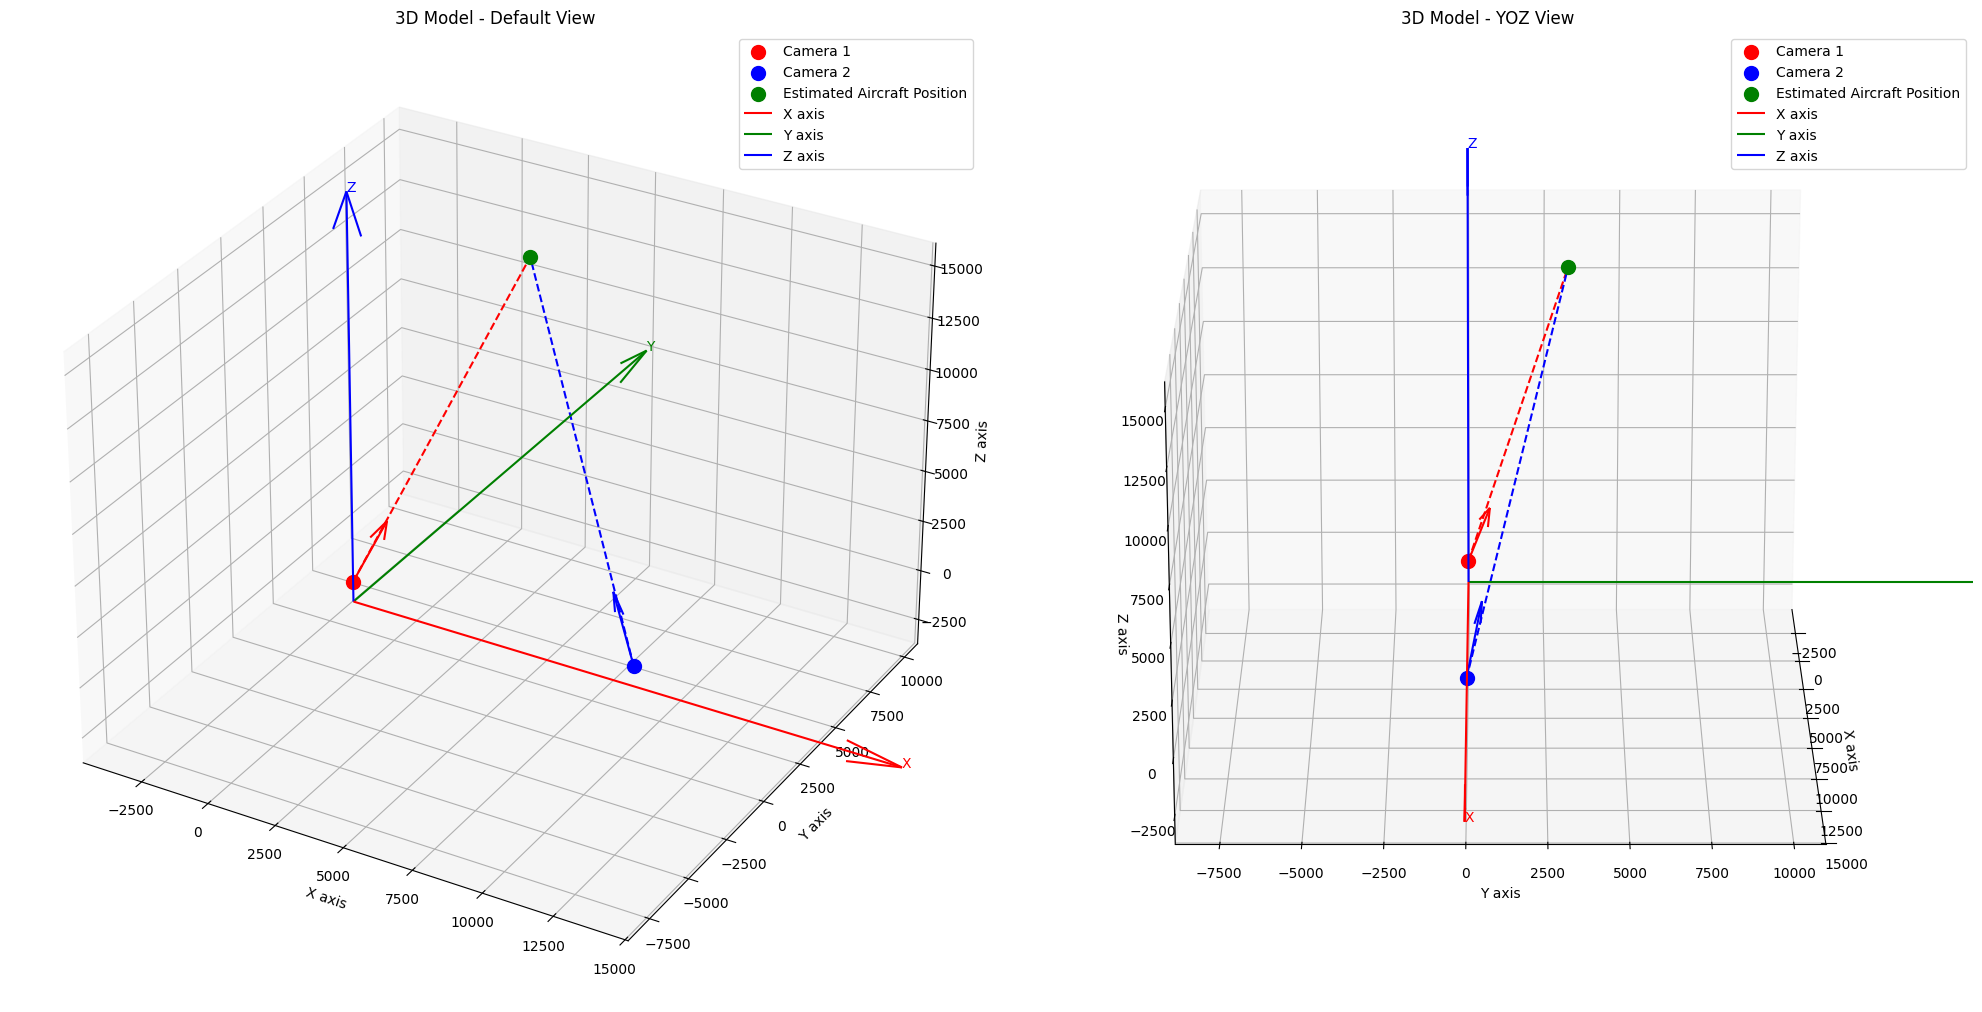

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def plot_3d_model(D, aircraft_position, M1, M2, camera1_pos, camera2_pos):
    fig = plt.figure(figsize=(20, 10))
    
    # Subplot 1: Default view
    ax1 = fig.add_subplot(121, projection='3d')
    plot_subplot(ax1, D, aircraft_position, M1, M2, camera1_pos, camera2_pos, "Default View")
    
    # Subplot 2: YOZ view
    ax2 = fig.add_subplot(122, projection='3d')
    plot_subplot(ax2, D, aircraft_position, M1, M2, camera1_pos, camera2_pos, "YOZ View")
    ax2.view_init(elev=20, azim=0)
    
    plt.tight_layout()
    plt.show()

def plot_subplot(ax, D, aircraft_position, M1, M2, camera1_pos, camera2_pos, view_title):
    # Set scale factor based on camera distance
    scale = D * 0.3  # You can adjust this multiplier to change the relative length

    # Plot cameras
    ax.scatter(*camera1_pos, color='r', s=100, label='Camera 1')
    ax.scatter(*camera2_pos, color='b', s=100, label='Camera 2')

    # Plot camera direction vectors
    ax.quiver(*camera1_pos, *(M1 * scale), color='r')
    ax.quiver(*camera2_pos, *(M2 * scale), color='b')

    # Plot estimated aircraft position
    ax.scatter(*aircraft_position, color='g', s=100, label='Estimated Aircraft Position')

    # Connect cameras to aircraft position
    ax.plot([camera1_pos[0], aircraft_position[0]], 
            [camera1_pos[1], aircraft_position[1]], 
            [camera1_pos[2], aircraft_position[2]], 'r--')
    ax.plot([camera2_pos[0], aircraft_position[0]], 
            [camera2_pos[1], aircraft_position[1]], 
            [camera2_pos[2], aircraft_position[2]], 'b--')

    # Add coordinate axes
    origin = [0, 0, 0]
    axis_length = max(np.max(np.abs(aircraft_position)), D, 
                      np.max(np.abs(camera1_pos)), np.max(np.abs(camera2_pos))) * 1.2
    ax.quiver(*origin, axis_length, 0, 0, color='r', arrow_length_ratio=0.1, label='X axis')
    ax.quiver(*origin, 0, axis_length, 0, color='g', arrow_length_ratio=0.1, label='Y axis')
    ax.quiver(*origin, 0, 0, axis_length, color='b', arrow_length_ratio=0.1, label='Z axis')

    # Set labels and title
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    ax.set_title(f'3D Model - {view_title}')

    # Set axis limits
    max_range = np.array([camera1_pos, camera2_pos, aircraft_position, 
                          [axis_length, axis_length, axis_length]]).ptp(axis=0).max() / 2.0
    mid_x = (camera1_pos[0] + camera2_pos[0]) / 2
    mid_y = (camera1_pos[1] + camera2_pos[1] + aircraft_position[1]) / 3
    mid_z = (camera1_pos[2] + camera2_pos[2] + aircraft_position[2]) / 3
    ax.set_xlim(mid_x - max_range, mid_x + max_range)
    ax.set_ylim(mid_y - max_range, mid_y + max_range)
    ax.set_zlim(mid_z - max_range, mid_z + max_range)

    # Add text labels for axes
    ax.text(axis_length, 0, 0, "X", color='red')
    ax.text(0, axis_length, 0, "Y", color='green')
    ax.text(0, 0, axis_length, "Z", color='blue')

    ax.legend()

# Sử dụng hàm với dữ liệu từ tính toán trước đó
plot_3d_model(D, aircraft_position, M1, M2, camera1_pos, camera2_pos)


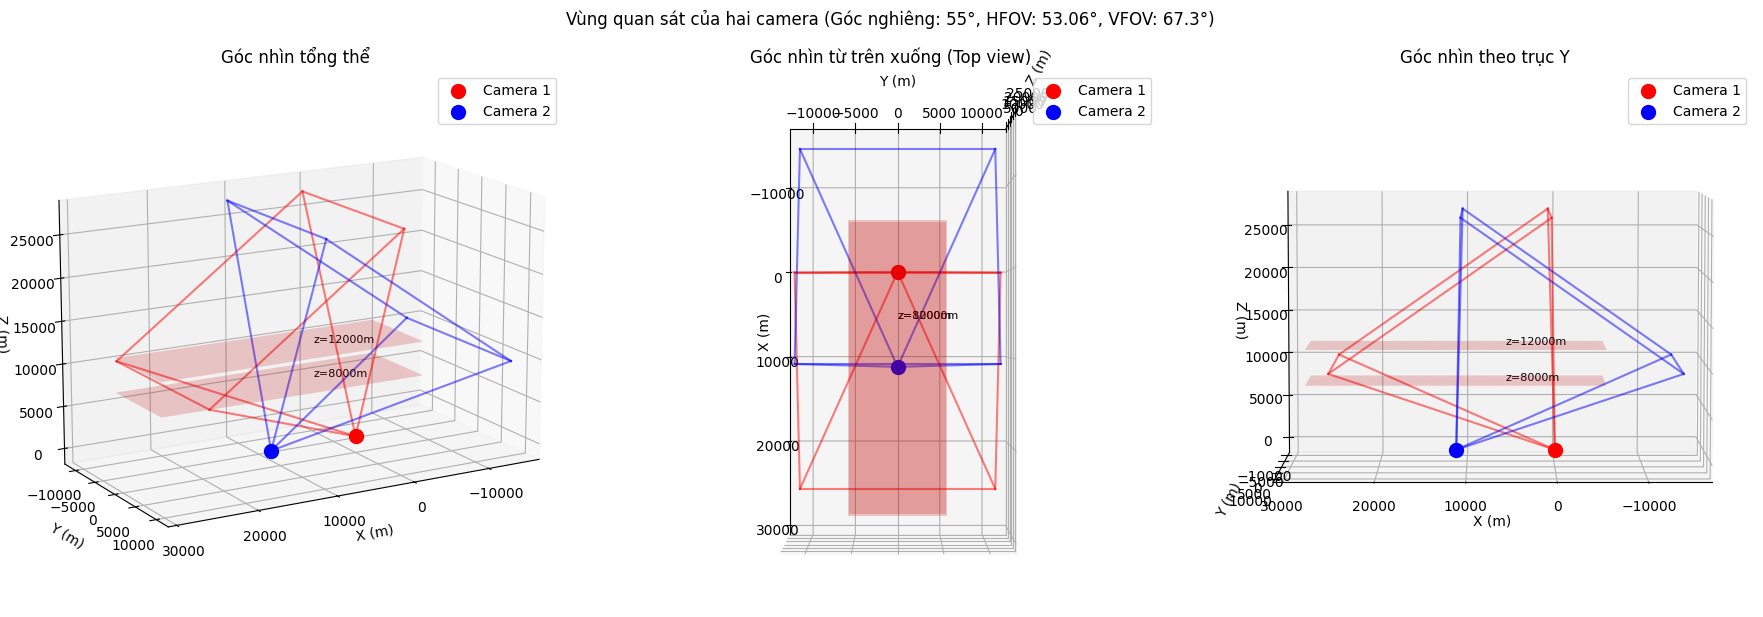

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

def plot_camera_coverage(D, camera1_pos, camera2_pos, tilt_angle, hfov, vfov, view_angles, plane_heights):
    fig = plt.figure(figsize=(18, 6))
    
    # Tạo 3 subplot cho 3 góc nhìn khác nhau
    plots = []
    for i, (elev, azim) in enumerate(view_angles):
        ax = fig.add_subplot(1, 3, i+1, projection='3d')
        plots.append(ax)
        
        # Vẽ vị trí camera
        ax.scatter(camera1_pos[0], camera1_pos[1], camera1_pos[2], color='red', s=100, label='Camera 1')
        ax.scatter(camera2_pos[0], camera2_pos[1], camera2_pos[2], color='blue', s=100, label='Camera 2')

        # Chuyển đổi góc nghiêng và FOV sang radian
        tilt_angle_rad = np.radians(tilt_angle)
        hfov_rad = np.radians(hfov)
        vfov_rad = np.radians(vfov)

        # Tính toán vector hướng cho mỗi camera
        direction1 = np.array([np.cos(tilt_angle_rad), 0, np.sin(tilt_angle_rad)])
        direction2 = np.array([-np.cos(tilt_angle_rad), 0, np.sin(tilt_angle_rad)])

        # Tính toán và vẽ hình chóp tứ giác cho mỗi camera
        for pos, direction, color in [(camera1_pos, direction1, 'red'), (camera2_pos, direction2, 'blue')]:
            # Tính các vector vuông góc với hướng camera
            up = np.array([0, 0, 1])
            right = np.cross(direction, up)
            right = right / np.linalg.norm(right)
            up = np.cross(right, direction)

            # Tính các đỉnh của hình chóp tứ giác
            dist = D * 2  # Độ dài của hình chóp
            width = 2 * dist * np.tan(hfov_rad/2)
            height = 2 * dist * np.tan(vfov_rad/2)

            top_right = pos + dist * direction + (width/2) * right + (height/2) * up
            top_left = pos + dist * direction - (width/2) * right + (height/2) * up
            bottom_right = pos + dist * direction + (width/2) * right - (height/2) * up
            bottom_left = pos + dist * direction - (width/2) * right - (height/2) * up

            # Vẽ các cạnh của hình chóp
            for start, end in [(pos, top_right), (pos, top_left), (pos, bottom_right), (pos, bottom_left),
                               (top_right, top_left), (top_right, bottom_right),
                               (top_left, bottom_left), (bottom_right, bottom_left)]:
                ax.plot([start[0], end[0]], [start[1], end[1]], [start[2], end[2]], color=color, alpha=0.5)

        # Vẽ mặt phẳng z=constant
        for height in plane_heights:
            x = np.linspace(-D/2, D*2.5, 100)
            y = np.linspace(-D/2, D/2, 100)
            X, Y = np.meshgrid(x, y)
            Z = np.full_like(X, height)
            
            # Vẽ mặt phẳng với màu xám nhạt và độ trong suốt
            ax.plot_surface(X, Y, Z, alpha=0.2, color='red')
            
            # Thêm nhãn cho mặt phẳng
            ax.text(D/2, 0, height, f'z={height}m', fontsize=8)

        # Thiết lập trục và nhãn
        ax.set_xlabel('X (m)')
        ax.set_ylabel('Y (m)')
        ax.set_zlabel('Z (m)')
        
        # Đặt tiêu đề cho từng subplot
        if i == 0:
            ax.set_title('Góc nhìn tổng thể')
        elif i == 1:
            ax.set_title('Góc nhìn từ trên xuống (Top view)')
        else:
            ax.set_title('Góc nhìn theo trục Y')
            
        ax.legend()

        # Điều chỉnh góc nhìn
        ax.view_init(elev=elev, azim=azim)

        # Đặt tỷ lệ trục bằng nhau
        ax.set_box_aspect((np.ptp(ax.get_xlim()), np.ptp(ax.get_ylim()), np.ptp(ax.get_zlim())))

    plt.suptitle(f'Vùng quan sát của hai camera (Góc nghiêng: {tilt_angle}°, HFOV: {hfov}°, VFOV: {vfov}°)', y=1.02)
    plt.tight_layout()
    plt.show()

# Sử dụng hàm vẽ với các thông số
H1= 100
H2= 100
D = 11191  # Khoảng cách giữa hai camera
camera1_pos = np.array([0, 0, H1])
camera2_pos = np.array([D, 0, H2])
tilt_angle = 55
hfov = 53.06
vfov = 67.3

# Định nghĩa các góc nhìn (elev, azim) cho mỗi subplot
view_angles = [
    (15, 60),    # Góc nhìn tổng thể
    (90, 0),     # Góc nhìn từ trên xuống (Top view)
    (5, 90)      # Góc nhìn theo trục Y
]

# Định nghĩa độ cao của các mặt phẳng
plane_heights = [8000, 12000]

plot_camera_coverage(D, camera1_pos, camera2_pos, tilt_angle, hfov, vfov, view_angles, plane_heights)
